# 0. Data Preprocessing

In [126]:
import pandas as pd
import numpy as np

import seaborn as sns

%matplotlib inline
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [163]:
def prepare_data():
    
    global raw_df
    raw_df = pd.read_csv('student-mat.csv', ';')

    raw_df['age'] = raw_df['age'].astype('float')
    raw_df['absences'] = raw_df['absences'].astype('float')

    raw_df['school'] = raw_df['school'].astype('category')
    raw_df['sex'] = raw_df['sex'].astype('category')
    raw_df['address'] = raw_df['address'].astype('category')
    raw_df['famsize'] = raw_df['famsize'].astype('category')
    raw_df['Pstatus'] = raw_df['Pstatus'].astype('category')
    raw_df['Medu'] = raw_df['Medu'].astype('category')
    raw_df['Fedu'] = raw_df['Fedu'].astype('category')
    raw_df['Mjob'] = raw_df['Mjob'].astype('category')
    raw_df['Fjob'] = raw_df['Fjob'].astype('category')

    raw_df['reason'] = raw_df['reason'].astype('category')
    raw_df['guardian'] = raw_df['guardian'].astype('category')
    raw_df['traveltime'] = raw_df['traveltime'].astype('category')
    raw_df['studytime'] = raw_df['studytime'].astype('category')
    raw_df['failures'] = raw_df['failures'].astype('category')
    raw_df['schoolsup'] = raw_df['schoolsup'].astype('category')
    raw_df['famsup'] = raw_df['famsup'].astype('category')
    raw_df['paid'] = raw_df['paid'].astype('category')
    raw_df['activities'] = raw_df['activities'].astype('category')
    raw_df['nursery'] = raw_df['nursery'].astype('category')
    raw_df['higher'] = raw_df['higher'].astype('category')
    raw_df['internet'] = raw_df['internet'].astype('category')
    raw_df['romantic'] = raw_df['romantic'].astype('category')
    raw_df['famrel'] = raw_df['famrel'].astype('category')
    raw_df['freetime'] = raw_df['freetime'].astype('category')
    raw_df['goout'] = raw_df['goout'].astype('category')
    raw_df['Dalc'] = raw_df['Dalc'].astype('category')
    raw_df['Walc'] = raw_df['Walc'].astype('category')
    raw_df['health'] = raw_df['health'].astype('category')

    raw_df.head()

    global X_raw0
    X_raw0 = raw_df.iloc[:,0:-3]
    
    global y
    y = raw_df['G3'] # define the target variable (dependent variable) as y
    y = pd.DataFrame(data=y, columns=['G3'])

    y['class'] = 0
    y['class'][y.G3 >= 10] = 1
    
    X_raw0.head()

    global X
    X = pd.get_dummies(X_raw0, drop_first=True)

    X.head()

prepare_data()

In [164]:
raw_df.head()    

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18.0,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6.0,5,6,6
1,GP,F,17.0,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4.0,5,5,6
2,GP,F,15.0,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10.0,7,8,10
3,GP,F,15.0,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2.0,15,14,15
4,GP,F,16.0,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4.0,6,10,10


In [165]:
X.head()

,age,absences,school_MS,sex_M,address_U,famsize_LE3,Pstatus_T,Medu_1,Medu_2,Medu_3,...,Dalc_4,Dalc_5,Walc_2,Walc_3,Walc_4,Walc_5,health_2,health_3,health_4,health_5
0,18.0,6.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,17.0,4.0,0,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,15.0,10.0,0,0,1,1,1,1,0,0,...,0,0,0,1,0,0,0,1,0,0
3,15.0,2.0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,16.0,4.0,0,0,1,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,1


In [166]:
y.head()

,G3,class
0,6,0
1,6,0
2,10,1
3,15,1
4,10,1


In [169]:
X_org = X.copy()

from sklearn.preprocessing import StandardScaler

cols = X.columns

X2 = StandardScaler().fit_transform(X[['age', 'absences']])

X2 = pd.DataFrame(data=X2,columns=['age', 'absences'])

X2.head()

X.drop(columns=['age', 'absences'], inplace=True)

X.head()

X = pd.concat([X2, X], axis=1)

In [170]:
X.head()

,age,absences,school_MS,sex_M,address_U,famsize_LE3,Pstatus_T,Medu_1,Medu_2,Medu_3,...,Dalc_4,Dalc_5,Walc_2,Walc_3,Walc_4,Walc_5,health_2,health_3,health_4,health_5
0,1.023046,0.036424,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.238380,-0.213796,0,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,-1.330954,0.536865,0,0,1,1,1,1,0,0,...,0,0,0,1,0,0,0,1,0,0
3,-1.330954,-0.464016,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,-0.546287,-0.213796,0,0,1,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,1


# 1. Tasks

## 1.1. Clustering on Dataset

### 1.1.1. K-means:

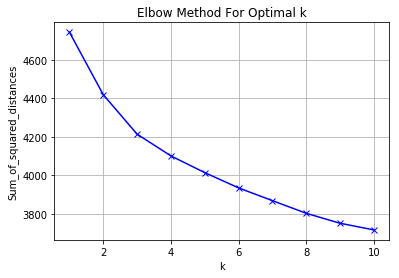

In [171]:
from sklearn.cluster import KMeans

Nc = range(1, 11)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans

Sum_of_squared_distances = []
for k in Nc:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(Nc, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.grid()
plt.show()

In [201]:
model = KMeans(n_clusters=2, random_state=1)

model.fit(X)

y['cluster'] = model.predict(X)

from sklearn.metrics import accuracy_score
accuracy_score(y['class'], y.cluster)

0.6025316455696202

In [202]:
y.head()

,G3,class,cluster
0,6,0,0
1,6,0,0
2,10,1,1
3,15,1,1
4,10,1,1


In [203]:
def plot_2f(X,col1,col2,y,col_y):
    markers = ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']

    for i in range(y.iloc[:,col_y].unique().shape[0]-1, -1, -1):
        X_filtered = X[y.iloc[:,col_y] == i]
        y_filtered = y[y.iloc[:,col_y] == i]
        plt.scatter(X_filtered.iloc[:,col1], X_filtered.iloc[:,col2], 
                    marker=markers[i], label=y.columns[col_y]+"{0}".format(i),
                   s=5)
    plt.xlabel(X_filtered.columns[col1])
    plt.ylabel(X_filtered.columns[col2])
    plt.grid()
    plt.legend()
#     plt.show()

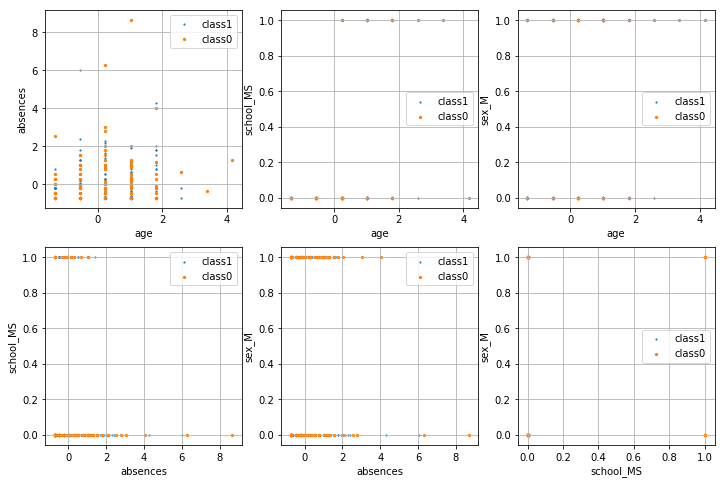

In [204]:
plt.figure(figsize=(12,8))
counter = 1
for i in range(0,4):
    for j in range (i+1,4):
        plt.subplot(2, 3, counter)
        counter += 1
        plot_2f(X, i, j, y, 1)
plt.show()

In [205]:
def plot_3f(X,col1,col2,col3,y,col_y):
    markers = ['.', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']

    from mpl_toolkits.mplot3d import Axes3D

    fig = plt.figure()
    ax = Axes3D(fig)

    for i in range(0, y.iloc[:,col_y].unique().shape[0] ):
        X_filtered = X[y.iloc[:,col_y] == i]
        y_filtered = y[y.iloc[:,col_y] == i]
        ax.scatter(X_filtered.iloc[:,col1], X_filtered.iloc[:,col2], 
                   X_filtered.iloc[:,col3], marker=markers[i], 
                   label=y.columns[col_y]+"{0}".format(i))

    plt.grid()
    plt.legend()
    plt.xlabel(X_filtered.columns[col1])
    plt.ylabel(X_filtered.columns[col2])
    ax.set_zlabel(X_filtered.columns[col3])    
    
    plt.show()

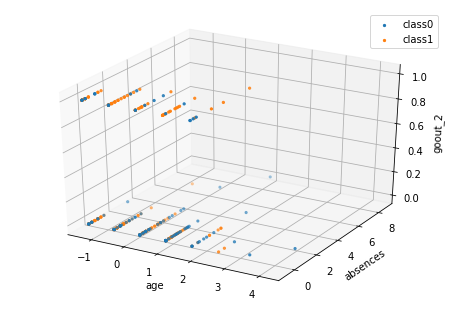

In [233]:
plot_3f(X,0,1,53,y,1)

### 1.1.2. Expectation Maximization

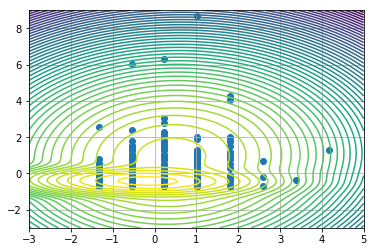

In [246]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2)
gmm.fit(X.iloc[:,[0,1]])

xx, yy = np.meshgrid(np.linspace(-3, 5, 100), np.linspace(-3, 9, 100))
xxx = np.array([xx.ravel(), yy.ravel()]).T
zz = gmm.score_samples(xxx)
zz = zz.reshape((100,100))
 
plt.contour(xx, yy, zz, 50)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1])
plt.grid()
plt.show()

In [265]:
gmm = GaussianMixture(n_components=2, random_state=5)
gmm.fit(X)

y['exp_max'] = gmm.predict(X)

y.head()

accuracy_score(y['class'], y.exp_max)

0.6379746835443038

## 1.2. Dimensionality Reduction on Dataset

### 1.2.1. Random Forest

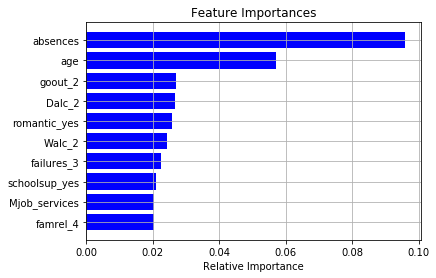

In [272]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X, y['class'])
rf.feature_importances_

features = X.columns
importances = rf.feature_importances_
indices = np.argsort(importances)
indices = indices[-10:]

# plt.figure(figsize=(5,20))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.grid()
plt.show()

In [292]:
rf_selected_features = [features[i] for i in indices[-2:]]
rf_selected_features

['age', 'absences']

### 1.2.2. PCA

In [279]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, 
                           columns = ['principal component 1', 'principal component 2'])

In [280]:
finalDF_PCA = principalDf

finalDf = pd.concat([principalDf, y['class']], axis = 1)

In [281]:
pca.explained_variance_ratio_

array([0.10587295, 0.07722803])

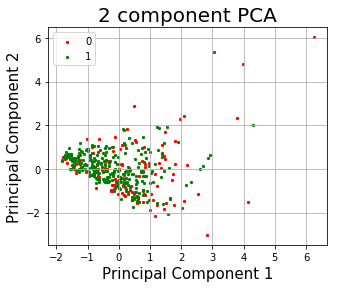

In [282]:
fig = plt.figure(figsize = (5,4))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['class'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 5)
ax.legend(targets)
ax.grid()

In [284]:
from sklearn.decomposition import FastICA
pca = FastICA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, 
                           columns = ['i component 1', 'i component 2'])

In [285]:
finalDF_ICA = principalDf

finalDf = pd.concat([principalDf, y['class']], axis = 1)

pca.components_

array([[-4.25290962e-02,  4.70581308e-03, -6.83024667e-03,
         3.01103735e-04,  3.82833596e-03, -7.75564956e-04,
        -1.22072518e-03, -4.68388728e-03, -1.96627378e-03,
        -1.31248302e-04,  7.04597504e-03, -6.16873919e-03,
        -4.47726876e-04,  1.36119771e-03,  5.05710600e-03,
         1.59675584e-03, -2.71624949e-03,  8.96073842e-04,
         2.91647681e-03,  1.43638328e-03, -1.33992776e-03,
        -8.92636210e-04,  1.60916832e-03,  2.10453554e-04,
        -5.32478798e-04,  1.81068521e-03,  4.04783869e-03,
        -4.93502763e-03, -2.37854236e-03, -1.19684129e-03,
         2.31019064e-05,  1.09618373e-03, -1.43259504e-03,
         8.11778449e-04, -3.78649295e-03, -4.97990142e-04,
        -1.73701143e-03,  4.07925479e-03,  5.77544797e-03,
         2.96323785e-03,  3.61790970e-03,  3.11218264e-03,
         2.32971073e-03,  3.59018577e-03, -2.69725400e-03,
         9.07361667e-05,  4.57588217e-04,  3.42232579e-04,
        -1.19671495e-03,  1.96716608e-06,  1.54091189e-0

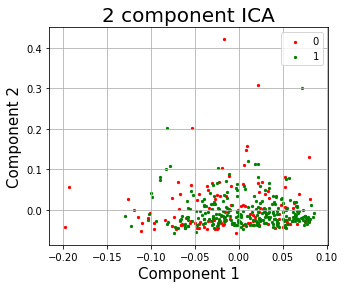

In [286]:
fig = plt.figure(figsize = (5,4))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Component 1', fontsize = 15)
ax.set_ylabel('Component 2', fontsize = 15)
ax.set_title('2 component ICA', fontsize = 20)
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['class'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'i component 1']
               , finalDf.loc[indicesToKeep, 'i component 2']
               , c = color
               , s = 5)
ax.legend(targets)
ax.grid()

### 1.2.3. Randomized Projections

In [287]:
from sklearn import random_projection

transformer = random_projection.GaussianRandomProjection(n_components=2)
principalComponents = transformer.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, 
                           columns = ['random projection component 1', 'random projection component 2'])

In [288]:
finalDF_RP = principalDf

finalDf = pd.concat([principalDf, y['class']], axis = 1)

transformer.components_

array([[-0.01106128,  0.3562218 ,  0.65467636,  1.00448938, -0.68706152,
         0.4740233 , -0.27381915, -0.57460399,  0.34111964, -0.77898976,
         0.22699032,  0.14364991,  0.67280343, -0.09017273, -0.68063014,
        -0.63514396, -0.08055087,  1.06905566, -0.99760568, -1.00591174,
         0.48792997,  0.64479202,  0.68167494,  0.13779063,  1.14126625,
        -0.97179195,  0.25103641, -0.49738919, -0.40454826,  0.08045917,
         0.91543283,  1.14590005, -1.36622044, -0.98982203, -0.69025141,
        -0.56116524, -0.66818845, -0.18031573,  0.31959762, -0.75114832,
         0.27555497,  0.09415836, -0.44483457,  0.56495744,  0.41013994,
        -0.09169489,  0.34837719, -0.48073143, -0.160188  , -0.80983162,
        -0.31915372, -0.88602164, -0.68173022,  0.32767881,  0.74035363,
        -1.10761286, -0.88788816,  1.03822868,  0.4643616 , -0.12666477,
         0.84192888,  0.20353398, -0.94001382,  0.08810787,  0.64538458,
         0.75616267,  1.06791228,  0.91126848,  0.3

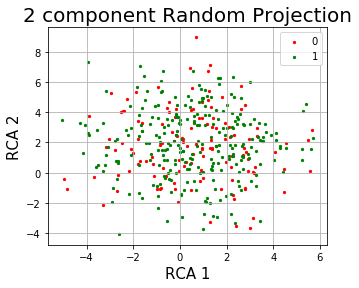

In [289]:
fig = plt.figure(figsize = (5,4))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('RCA 1', fontsize = 15)
ax.set_ylabel('RCA 2', fontsize = 15)
ax.set_title('2 component Random Projection', fontsize = 20)
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['class'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'random projection component 1']
               , finalDf.loc[indicesToKeep, 'random projection component 2']
               , c = color
               , s = 5)
ax.legend(targets)
ax.grid()

## 1.3. Clustering after Dim Reduction

### 1.3.1. K-means:

#### 1.3.1.1. Random Forest

In [291]:
X.head()

,age,absences,school_MS,sex_M,address_U,famsize_LE3,Pstatus_T,Medu_1,Medu_2,Medu_3,...,Dalc_4,Dalc_5,Walc_2,Walc_3,Walc_4,Walc_5,health_2,health_3,health_4,health_5
0,1.023046,0.036424,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.238380,-0.213796,0,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,-1.330954,0.536865,0,0,1,1,1,1,0,0,...,0,0,0,1,0,0,0,1,0,0
3,-1.330954,-0.464016,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,-0.546287,-0.213796,0,0,1,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,1


In [295]:
X_rf_selected = X[rf_selected_features]

X_rf_selected.head()

,age,absences
0,1.023046,0.036424
1,0.238380,-0.213796
2,-1.330954,0.536865
3,-1.330954,-0.464016
4,-0.546287,-0.213796


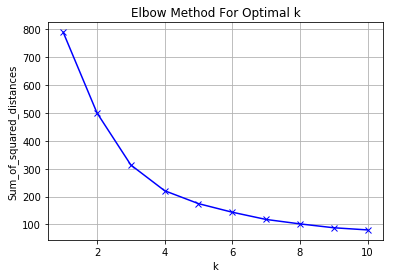

In [296]:
from sklearn.cluster import KMeans

Nc = range(1, 11)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans

Sum_of_squared_distances = []
for k in Nc:
    km = KMeans(n_clusters=k)
    km = km.fit(X_rf_selected)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(Nc, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.grid()
plt.show()

In [301]:
model = KMeans(n_clusters=2, random_state=3)

model.fit(X_rf_selected)

y['cluster'] = model.predict(X_rf_selected)

accuracy_score(y['class'], y.cluster)

0.5518987341772152

In [302]:
y.head()

,G3,class,cluster,exp_max
0,6,0,0,1
1,6,0,0,1
2,10,1,1,1
3,15,1,1,1
4,10,1,1,1


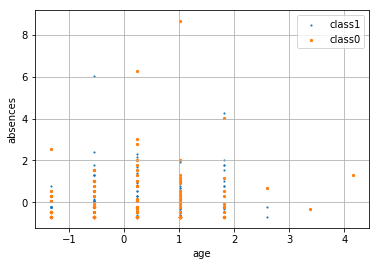

In [309]:
plot_2f(X_rf_selected, 0, 1, y, 1)
plt.show()

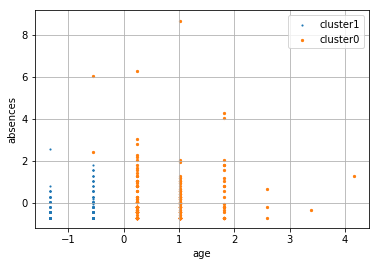

In [310]:
plot_2f(X_rf_selected, 0, 1, y, 2)
plt.show()

#### 1.3.1.2. PCA

In [314]:
finalDF_PCA.head()

,principal component 1,principal component 2
0,0.640847,-0.340412
1,0.126040,-0.723542
2,-0.615628,0.869223
3,-1.520226,0.676641
4,-0.559966,0.211851


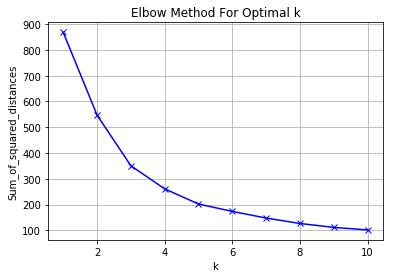

In [315]:
from sklearn.cluster import KMeans

Nc = range(1, 11)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans

Sum_of_squared_distances = []
for k in Nc:
    km = KMeans(n_clusters=k)
    km = km.fit(finalDF_PCA)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(Nc, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.grid()
plt.show()

In [316]:
model = KMeans(n_clusters=2, random_state=5, )

model.fit(finalDF_PCA)

y['cluster'] = model.predict(finalDF_PCA)

accuracy_score(y['class'], y.cluster)

0.589873417721519

In [317]:
y.head()

,G3,class,cluster,exp_max
0,6,0,0,1
1,6,0,0,1
2,10,1,1,1
3,15,1,1,1
4,10,1,1,1


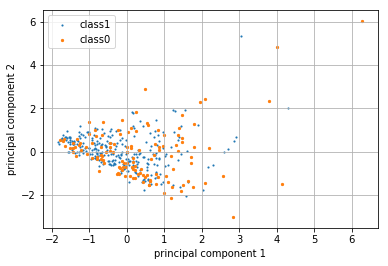

In [322]:
plot_2f(finalDF_PCA, 0, 1, y, 1)
plt.show()

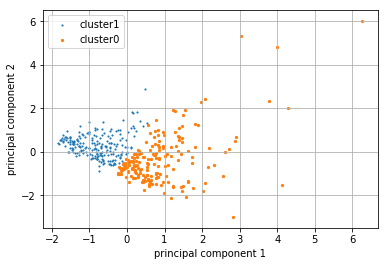

In [323]:
plot_2f(finalDF_PCA, 0, 1, y, 2)
plt.show()

#### 1.3.1.3. ICA

In [324]:
finalDF_ICA.head()

,i component 1,i component 2
0,-0.033392,0.004368
1,-0.028311,-0.025676
2,0.050034,0.017716
3,0.074879,-0.015652
4,0.026343,-0.007276


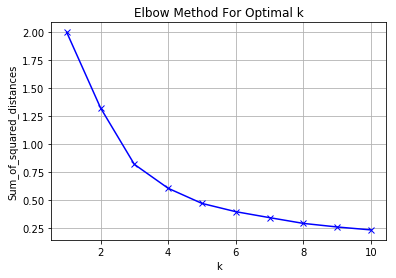

In [333]:
from sklearn.cluster import KMeans

Nc = range(1, 11)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans

Sum_of_squared_distances = []
for k in Nc:
    km = KMeans(n_clusters=k)
    km = km.fit(finalDF_ICA)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(Nc, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.grid()
plt.show()

In [331]:
model = KMeans(n_clusters=2, random_state=5)

model.fit(finalDF_ICA)

y['cluster'] = model.predict(finalDF_ICA)

accuracy_score(y['class'], y.cluster)

0.579746835443038

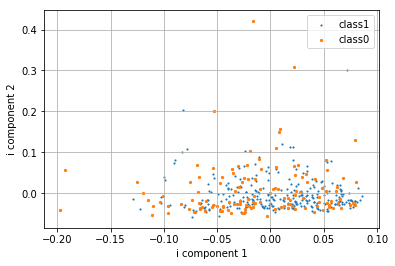

In [332]:
plot_2f(finalDF_ICA, 0, 1, y, 1)
plt.show()

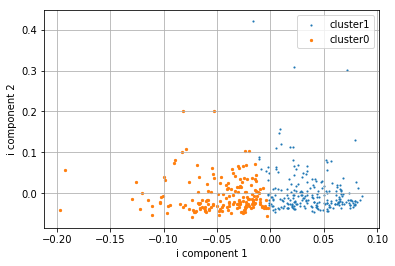

In [330]:
plot_2f(finalDF_ICA, 0, 1, y, 2)
plt.show()

#### 1.3.1.4. Random Projection

In [334]:
finalDF_RP.head()

,random projection component 1,random projection component 2
0,-0.835557,-1.099414
1,1.931844,3.268944
2,1.622836,3.555928
3,-0.513611,0.004586
4,-0.928846,3.623462


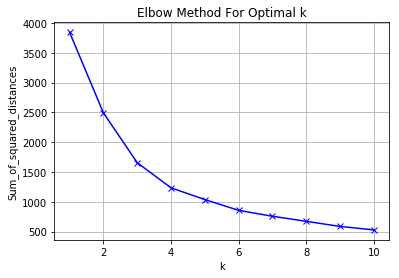

In [338]:
from sklearn.cluster import KMeans

Nc = range(1, 11)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans

Sum_of_squared_distances = []
for k in Nc:
    km = KMeans(n_clusters=k)
    km = km.fit(finalDF_RP)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(Nc, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.grid()
plt.show()

In [350]:
model = KMeans(n_clusters=2)

model.fit(finalDF_RP)

y['cluster'] = model.predict(finalDF_RP)

accuracy_score(y['class'], y.cluster)

0.5164556962025316

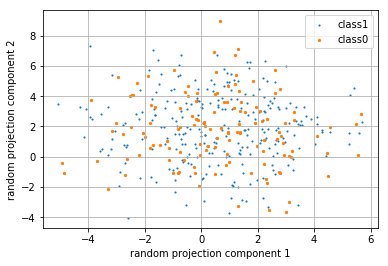

In [340]:
plot_2f(finalDF_RP, 0, 1, y, 1)
plt.show()

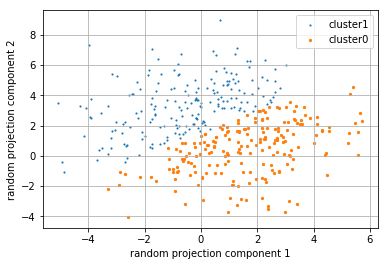

In [341]:
plot_2f(finalDF_RP, 0, 1, y, 2)
plt.show()

In [351]:
### 1.3.2. Expectation Maximization

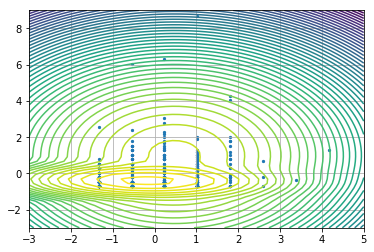

In [460]:
# RF:

from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2)
gmm.fit(X_rf_selected)

xx, yy = np.meshgrid(np.linspace(-3, 5, 50), np.linspace(-3, 9, 50))
xxx = np.array([xx.ravel(), yy.ravel()]).T
zz = gmm.score_samples(xxx)
zz = zz.reshape((50,50))
 
plt.contour(xx, yy, zz, 50)
plt.scatter(X_rf_selected.iloc[:, 0], X_rf_selected.iloc[:, 1],s=5)
plt.grid()
plt.show()

In [370]:
y['exp_max'] = gmm.predict(X_rf_selected)

accuracy_score(y['class'], y.exp_max)

0.6303797468354431

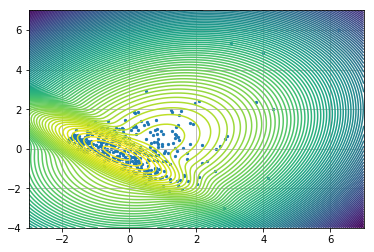

In [377]:
# PCA:

from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2)
gmm.fit(finalDF_PCA)

xx, yy = np.meshgrid(np.linspace(-3, 7, 100), np.linspace(-4, 7, 100))
xxx = np.array([xx.ravel(), yy.ravel()]).T
zz = gmm.score_samples(xxx)
zz = zz.reshape((100,100))
 
plt.contour(xx, yy, zz, 100)
plt.scatter(finalDF_PCA.iloc[:, 0], finalDF_PCA.iloc[:, 1],s=5)
plt.grid()
plt.show()

In [378]:
y['exp_max'] = gmm.predict(finalDF_PCA)

accuracy_score(y['class'], y.exp_max)

0.6329113924050633

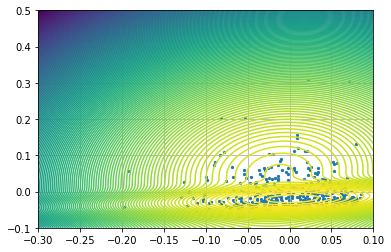

In [384]:
# ICA:

from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2)
gmm.fit(finalDF_ICA)

xx, yy = np.meshgrid(np.linspace(-.3, .1, 100), np.linspace(-.1, .5, 100))
xxx = np.array([xx.ravel(), yy.ravel()]).T
zz = gmm.score_samples(xxx)
zz = zz.reshape((100,100))
 
plt.contour(xx, yy, zz, 200)
plt.scatter(finalDF_ICA.iloc[:, 0], finalDF_ICA.iloc[:, 1],s=5)
plt.grid()
plt.show()

In [385]:
y['exp_max'] = gmm.predict(finalDF_ICA)

accuracy_score(y['class'], y.exp_max)

0.640506329113924

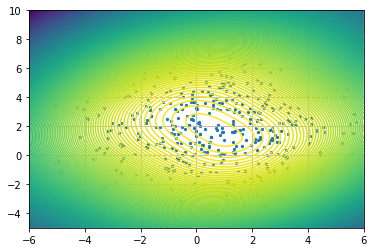

In [455]:
# RCA:

from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2)
gmm.fit(finalDF_RP)

xx, yy = np.meshgrid(np.linspace(-6, 6, 100), np.linspace(-5, 10, 100))
xxx = np.array([xx.ravel(), yy.ravel()]).T
zz = gmm.score_samples(xxx)
zz = zz.reshape((100,100))
 
plt.contour(xx, yy, zz, 200)
plt.scatter(finalDF_RP.iloc[:, 0], finalDF_RP.iloc[:, 1],s=5)
plt.grid()
plt.show()

In [456]:
y['exp_max'] = gmm.predict(finalDF_RP)

accuracy_score(y['class'], y.exp_max)

0.5240506329113924

In [461]:
## 1.2.4 Neural Network on Dim Reduction

In [462]:
X_rf_selected.head()

,age,absences
0,1.023046,0.036424
1,0.238380,-0.213796
2,-1.330954,0.536865
3,-1.330954,-0.464016
4,-0.546287,-0.213796


In [463]:
from sklearn.cross_validation import train_test_split

X_rf_sel_train, X_rf_sel_test, y_rf_sel_train, y_rf_sel_test = train_test_split(X_rf_selected, y['class'])

In [464]:
from sklearn import model_selection
from sklearn.neural_network import MLPClassifier

# Spot Check Algorithms
models = []
models.append(('RF', MLPClassifier(activation='tanh',max_iter=1000)))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10)
	cv_results = model_selection.cross_val_score(model, X_rf_sel_train, y_rf_sel_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

RF: 0.658966 (0.072981)


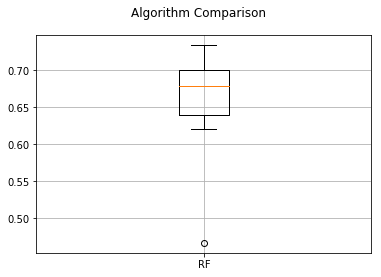

In [465]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.grid()
plt.show()

In [466]:
model = MLPClassifier(activation='tanh',max_iter=1000)

model.fit(X_rf_sel_train, y_rf_sel_train)

model.score(X_rf_sel_test, y_rf_sel_test)

0.6767676767676768

In [467]:
### 1.2.4.2. PCA

In [468]:
finalDF_PCA.head()

,principal component 1,principal component 2
0,0.640847,-0.340412
1,0.126040,-0.723542
2,-0.615628,0.869223
3,-1.520226,0.676641
4,-0.559966,0.211851


In [469]:
from sklearn.cross_validation import train_test_split

X_rf_sel_train, X_rf_sel_test, y_rf_sel_train, y_rf_sel_test = train_test_split(finalDF_PCA, y['class'])

In [470]:
# Spot Check Algorithms
models = []
models.append(('PCA', MLPClassifier(activation='tanh',max_iter=1000)))
# evaluate each model in turn
for name, model in models:
	kfold = model_selection.KFold(n_splits=10)
	cv_results = model_selection.cross_val_score(model, X_rf_sel_train, y_rf_sel_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

PCA: 0.665862 (0.063508)


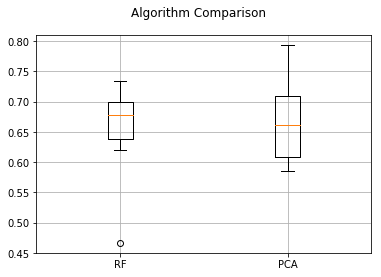

In [471]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.grid()
plt.show()

In [472]:
model = MLPClassifier(activation='tanh',max_iter=1000)

model.fit(X_rf_sel_train, y_rf_sel_train)

model.score(X_rf_sel_test, y_rf_sel_test)

0.6565656565656566

In [473]:
### 1.2.4.3. ICA

In [474]:
finalDF_ICA.head()

,i component 1,i component 2
0,-0.033392,0.004368
1,-0.028311,-0.025676
2,0.050034,0.017716
3,0.074879,-0.015652
4,0.026343,-0.007276


In [475]:
from sklearn.cross_validation import train_test_split

X_rf_sel_train, X_rf_sel_test, y_rf_sel_train, y_rf_sel_test = train_test_split(finalDF_ICA, y['class'])

In [476]:
# Spot Check Algorithms
models = []
models.append(('ICA', MLPClassifier(activation='tanh',max_iter=1000)))
# evaluate each model in turn
for name, model in models:
	kfold = model_selection.KFold(n_splits=10)
	cv_results = model_selection.cross_val_score(model, X_rf_sel_train, y_rf_sel_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

ICA: 0.678851 (0.069266)


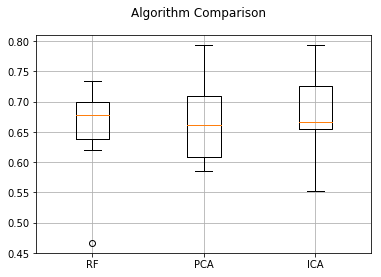

In [477]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.grid()
plt.show()

In [478]:
model = MLPClassifier(activation='tanh',max_iter=1000)

model.fit(X_rf_sel_train, y_rf_sel_train)

model.score(X_rf_sel_test, y_rf_sel_test)

0.6565656565656566

In [479]:
### 1.2.4.3. Random Projection

In [480]:
finalDF_RP.head()

,random projection component 1,random projection component 2
0,-0.835557,-1.099414
1,1.931844,3.268944
2,1.622836,3.555928
3,-0.513611,0.004586
4,-0.928846,3.623462


In [481]:
from sklearn.cross_validation import train_test_split

X_rf_sel_train, X_rf_sel_test, y_rf_sel_train, y_rf_sel_test = train_test_split(finalDF_RP, y['class'])

In [482]:
# Spot Check Algorithms
models = []
models.append(('RCA', MLPClassifier(activation='tanh',max_iter=1000)))
# evaluate each model in turn
for name, model in models:
	kfold = model_selection.KFold(n_splits=10)
	cv_results = model_selection.cross_val_score(model, X_rf_sel_train, y_rf_sel_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

RCA: 0.682759 (0.084883)


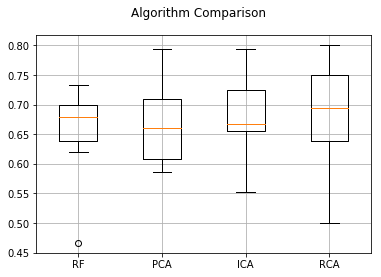

In [483]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.grid()
plt.show()

In [484]:
model = MLPClassifier(activation='tanh',max_iter=1000)

model.fit(X_rf_sel_train, y_rf_sel_train)

model.score(X_rf_sel_test, y_rf_sel_test)

0.6363636363636364

In [485]:
## 1.2.5. Apply Neural Network on New Data

In [486]:
### 1.2.5.1. K-means:

In [487]:
y.head()

,G3,class,cluster,exp_max
0,6,0,1,1
1,6,0,0,1
2,10,1,0,0
3,15,1,1,1
4,10,1,0,0


In [488]:
model = KMeans(n_clusters=2)
model.fit(X)
y['cluster'] = model.predict(X)

accuracy_score(y['class'], y.cluster)

0.6050632911392405

In [489]:
from sklearn.cross_validation import train_test_split

X_rf_sel_train, X_rf_sel_test, y_rf_sel_train, y_rf_sel_test = train_test_split(y.cluster.values.reshape(-1,1), y['class'])

In [490]:
# Spot Check Algorithms
models = []
models.append(('K-Means', MLPClassifier(activation='tanh',max_iter=1000)))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10)
	cv_results = model_selection.cross_val_score(model, X_rf_sel_train, y_rf_sel_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

K-Means: 0.673103 (0.116284)


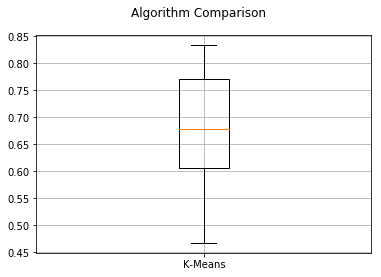

In [491]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.grid()
plt.show()

In [492]:
### 1.2.5.2. Expectation Maximization:

In [493]:
y.head()

,G3,class,cluster,exp_max
0,6,0,0,1
1,6,0,0,1
2,10,1,1,0
3,15,1,1,1
4,10,1,1,0


In [494]:
model = GaussianMixture(n_components=2, random_state=7)
model.fit(X)
y['exp_max'] = model.predict(X)

accuracy_score(y['class'], y.exp_max)

0.6227848101265823

In [495]:
from sklearn.cross_validation import train_test_split

X_rf_sel_train, X_rf_sel_test, y_rf_sel_train, y_rf_sel_test = train_test_split(y.exp_max.values.reshape(-1,1), y['class'])

In [496]:
# Spot Check Algorithms
models = []
models.append(('ExpMax', MLPClassifier(activation='tanh',max_iter=1000)))
# evaluate each model in turn
for name, model in models:
	kfold = model_selection.KFold(n_splits=10)
	cv_results = model_selection.cross_val_score(model, X_rf_sel_train, y_rf_sel_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

ExpMax: 0.648966 (0.066242)


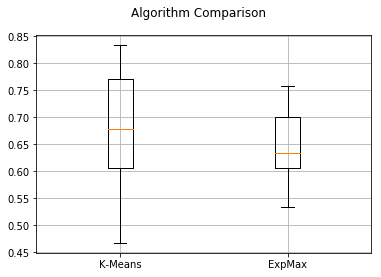

In [497]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.grid()
plt.show()